In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("OpenCV version:", cv2.__version__)
print("Numpy version:", np.__version__)

OpenCV version: 4.8.1

Numpy version: 1.26.0

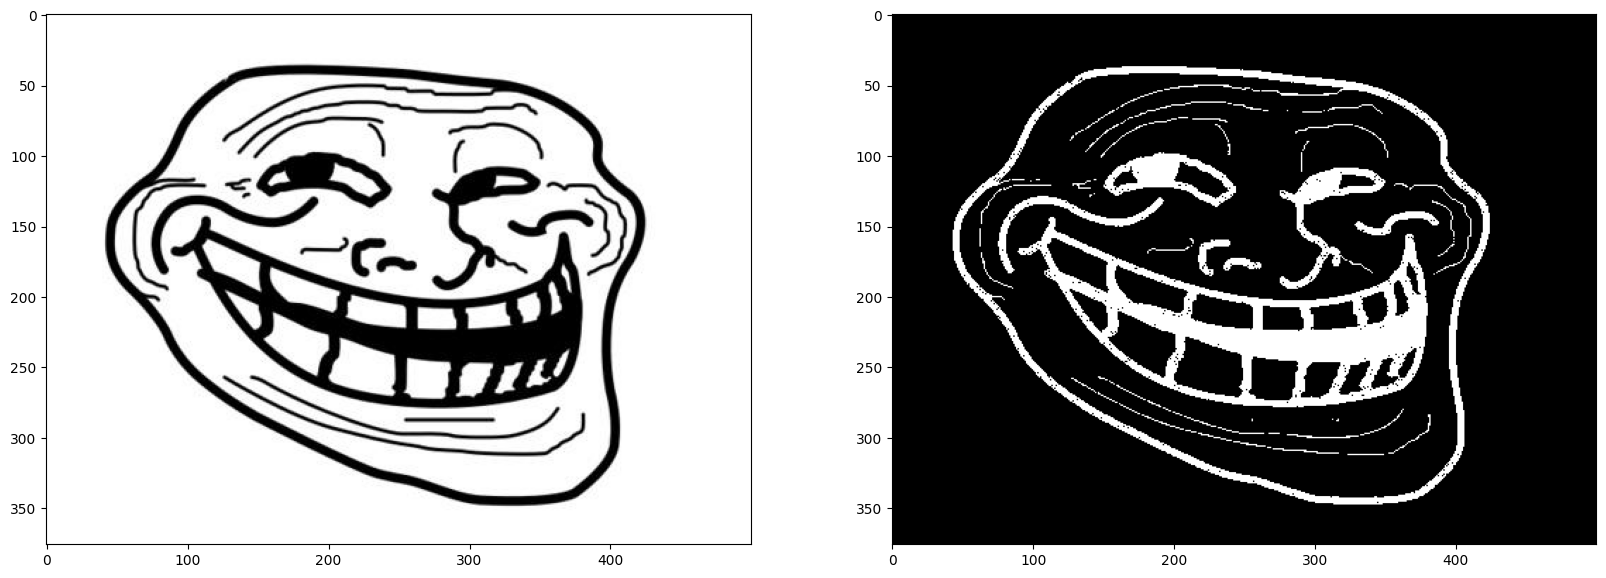

In [6]:
image = cv2.imread("./imgs/Trollface.jpg")
# Convert to B and W only img with a threshold of 127
bw = cv2.threshold(image, 12, 255, cv2.THRESH_BINARY)[1]
bw = cv2.cvtColor(bw, cv2.COLOR_BGR2GRAY)
# invert the image
bw = cv2.bitwise_not(bw)
# convert to 0 and 1 values
bw[bw > 0] = 1

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(image)
ax[1].imshow(bw, cmap="gray")
plt.show()

In [3]:
def erosion(kernel: np.ndarray, bw: np.ndarray) -> np.ndarray:
    kernel_w = kernel.shape[0]
    kernel_h = kernel.shape[1]
    half_w = kernel_w // 2
    half_h = kernel_h // 2
    erosion = np.zeros(bw.shape, np.uint8)
    kernel_center = kernel[half_w, half_h]
    for x in range(half_w, bw.shape[0]-half_w):
        for y in range(half_h, bw.shape[1]-half_h):
            # only keep what matches the kernel
            img_slice = bw[x-half_w:x+half_w+1, y-half_h:y+half_h+1]
            if np.array_equal(img_slice, kernel):
                erosion[x,y] = kernel_center
    return erosion

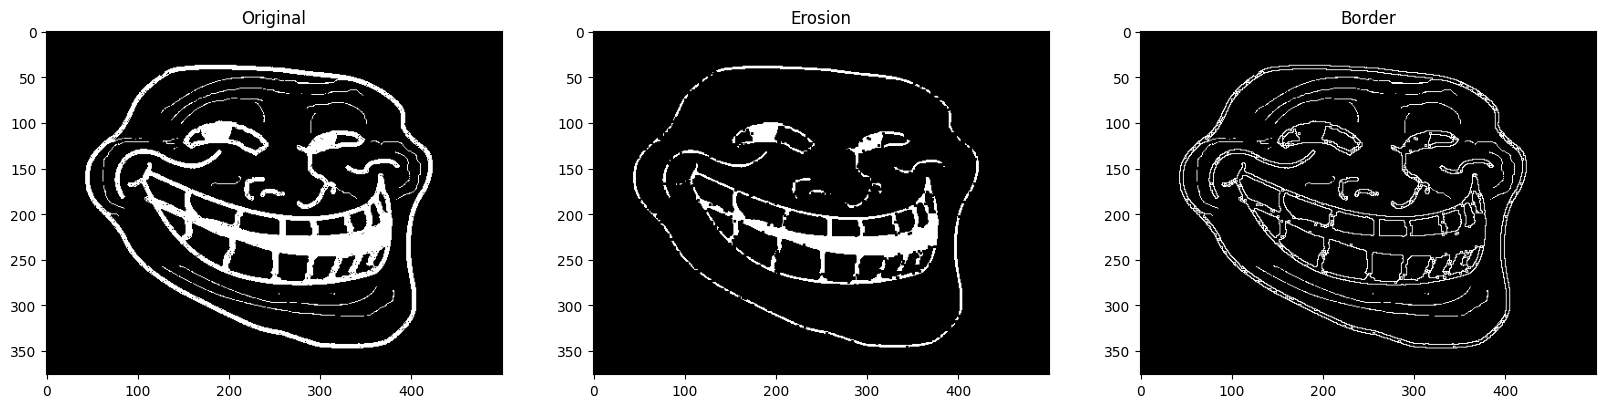

In [5]:
kernel = np.ones((3,3), np.uint8)
erosion_img = erosion(kernel, bw)
border = bw - erosion_img
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(bw, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(erosion_img, cmap="gray")
ax[1].set_title("Erosion")
ax[2].imshow(border, cmap="gray")
ax[2].set_title("Border")
plt.show()